# *k*-Nearest Neighbor

We'll implement *k*-Nearest Neighbor (*k*-NN) algorithm for this assignment. We recommend using [Madelon](https://archive.ics.uci.edu/ml/datasets/Madelon) dataset, although it is not mandatory. If you choose to use a different dataset, it should meet the following criteria:
* dependent variable should be binary (suited for binary classification)
* number of features (attributes) should be at least 50
* number of examples (instances) should be between 1,000 - 5,000

A skeleton of a general supervised learning model is provided in "model.ipynb". The functions that will be implemented there will be indicated in this notebook. 

### Assignment Goals:
In this assignment, we will:
* we'll implement 'Euclidean' and 'Manhattan' distance metrics 
* use the validation dataset to find a good value for *k*
* Evaluate our model with respect to performance measures:
    * accuracy, generalization error and ROC curve
* Try to assess if *k*-NN is suitable for the dataset you used


# GRADING

You will be graded on parts that are marked with **\#TODO** comments. Read the comments in the code to make sure you don't miss any.

### Mandatory for 478 & 878:

|   | Tasks                      | 478 | 878 |
|---|----------------------------|-----|-----|
| 1 | Implement `distance`       |  10 |  10 |
| 2 | Implement `k-NN` methods   |  25 |  20 |
| 3 | Model evaluation           |  25 |  20 |
| 4 | Learning curve             |  20 |  20 |
| 6 | ROC curve analysis         |  20 |  20 |

### Mandatory for 878, bonus for 478

|   | Tasks          | 478 | 878 |
|---|----------------|-----|-----|
| 5 | Optimizing *k* | 10  | 10  |

### Bonus for 478/878

|   | Tasks          | 478 | 878 |
|---|----------------|-----|-----|
| 7 | Assess suitability of *k*-NN | 10  | 10  |

Points are broken down further below in Rubric sections. The **first** score is for 478, the **second** is for 878 students. There a total of 100 points in this assignment and extra 20 bonus points for 478 students and 10 bonus points for 878 students.

You can use numpy for array operations and matplotlib for plotting for this assignment. Please do not add other libraries.

In [119]:
import numpy as np
import matplotlib.pyplot as plt

Following code makes the Model class and relevant functions available from model.ipynb.

In [134]:
%run 'model_solution.ipynb'

## TASK 1: Implement `distance` function

Choice of distance metric plays an important role in the performance of *k*-NN. Let's start with implementing a distance method  in the "distance" function in **model.ipynb**. It should take two data points and the name of the metric and return a scalar value.

### Rubric:
* Euclidean +5, +5
* Manhattan +5, +5

### Test `distance`

In [136]:
x = np.array(range(100))
y = np.array(range(100, 200))
dist_euclidean = distance(x, y, 'Euclidean')
dist_manhattan = distance(x, y, 'Manhattan')
print('Euclidean distance: {}, Manhattan distance: {}'.format(dist_euclidean, dist_manhattan))

Euclidean distance: 1000.0, Manhattan distance: 10000


## TASK 2: Implement $k$-NN Class Methods

We can start implementing our *k*-NN classifier. *k*-NN class inherits Model class. Use the "distance" function you defined above. "fit" method takes *k* as an argument. "predict" takes as input an *mxd* array containing *d*-dimensional *m* feature vectors for examples and outputs the predicted class and the ratio of positive examples in *k* nearest neighbors.

### Rubric:
* correct implementation of fit method +5, +5
* correct implementation of predict method +20, +15

In [137]:
class kNN(Model):
    '''
    Inherits Model class. Implements the k-NN algorithm for classification.
    '''
       
    def fit(self, training_features, training_labels, k, distance_f, **kwargs):
        '''
        Fit the model. This is pretty straightforward for k-NN.
        Args:
            training_features: ndarray
            training_labels: ndarray
            k: int
            distance_f: function
            kwargs: dict
                Contains keyword arguments that will be passed to distance_f
        '''
        # TODO
        # set self.train_features, self.train_labels,self.k, self.distance_f, self.distance_metric
        self.train_features = training_features 
        self.train_labels = training_labels
        self.k = k
        self.distance_f = distance_f
        self.distance_metric = kwargs['metric']
    
        return
    
    
    def predict(self, test_features):
            
        test_size = len(test_features)
        train_size = len(self.train_labels)
        
        pred = np.empty(len(test_features))
        # TODO
        # for each point in test points
        for idx in range(test_size):
            point = test_features[idx]    
            distances = []
            labels = []
            

            for tr_idx in range(train_size):
                train_example = self.train_features[tr_idx]
                train_label = self.train_labels[tr_idx]
                dist = self.distance_f(point, train_example, metric = self.distance_metric)
                distances.append(dist)
                labels.append(train_label)
            
            # get the order of distances
            dist_order = np.argsort(distances)
            # get the labels of k points that are closest to test point
            k_labels = list(np.array(labels)[dist_order[::-1]][:self.k])
            
            # get number of positive labels in k neighbours
            b = k_labels.count(1)
            
            pred[idx] = b/self.k
    
        return pred
    

## TASK 3: Build and Evaluate the Model

### Rubric:
* Reasonable accuracy values +10, +5
* Reasonable confidence intervals on the error estimate +10, +10
* Reasonable confusion matrix +5, +5

Preprocess the data files and partition the data.

In [138]:
# initialize the model
my_model = kNN()
# obtain features and labels from files
features, labels = preprocess('../data/madelon.data', '../data/madelon.labels')
# partition the data set
val_indices, test_indices, train_indices = partition(features.shape[0], t = 0.3, v = 0.1)

Assign a value to *k* and fit the *k*-NN model.

In [139]:
# pass the training features and labels to the fit method
kwargs_f = {'metric': 'Euclidean'}
my_model.fit(features[train_indices], labels[train_indices], k=10, distance_f=distance, **kwargs_f)

### Computing the confusion matrix for *k* = 10
Now that we have the true labels and the predicted ones from our model, we can build a confusion matrix and see how accurate our model is. Implement the "conf_matrix" function (in model.ipynb) that takes as input an array of true labels (*true*) and an array of predicted labels (*pred*). It should output a numpy.ndarray. You do not need to change the value of the threshold parameter yet.

In [140]:
# TODO

# get model predictions
pred_ratios = my_model.predict(features[test_indices])
# For now, we will consider a data point as predicted in the positive class if more than 0.5 
# of its k-neighbors are positive.
threshold = 0.5
# convert predicted ratios to predicted labels
pred_labels = [1 if x >= threshold else 0 for x in pred_ratios]
tp,tn, fp, fn = conf_matrix(labels[test_indices], pred_labels)

Evaluate your model on the test data and report your **accuracy**. Also, calculate and report the 95% confidence interval on the generalization **error** estimate.

In [142]:
# TODO
# Calculate and report accuracy and generalization error with confidence interval here. Show your work in this cell.
accuracy = (tp+tn)/len(test_indices)
error = 1 - accuracy
diff = 0.96 * np.sqrt((error * (1 - error)) / len(test_indices))
lower_bound = error - diff
upper_bound = error + diff
print('Accuracy: {}'.format(accuracy))
print('Confidence interval: {}-{}'.format(lower_bound, upper_bound))


Accuracy: 0.475
Confidence interval: 0.49110132745961876-0.5588986725403813


 ## TASK 4: Plotting a learning curve
 
A learning curve shows how error changes as the training set size increases. For more information, see [learning curves](https://www.dataquest.io/blog/learning-curves-machine-learning/).
We'll plot the error values for training and validation data while varying the size of the training set. Report a good size for training set for which there is a good balance between bias and variance.

### Rubric:
* Correct training error calculation for different training set sizes +8, +8
* Correct validation error calculation for different training set sizes +8, +8
* Reasonable learning curve +4, +4

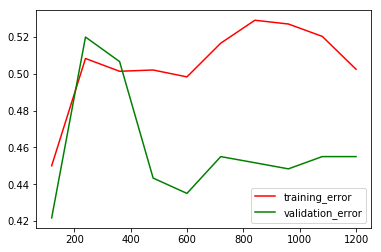

600 is a good training size


In [144]:
# try sizes 50, 100, 150, 200, ..., up to the largest multiple of 50 >= train_size
training_proportions = np.arange(0.10, 1.01, 0.10)

# TODO

# Calculate error for each entry in training_sizes
# for training and validation sets and populate
# error_train and error_val arrays. Each entry in these arrays
# should correspond to each entry in training_sizes.

error_train = []
error_val = []
training_sizes = []
for proportion in training_proportions:
    
    size = len(train_indices)
    size_avail = np.int(np.ceil(size*proportion))
    training_sizes.append(size_avail)
    idx_avail = train_indices[:size_avail]
    
    kwargs_f = {'metric': 'Euclidean'}
    my_model.fit(features[idx_avail], labels[idx_avail], k = 10, distance_f=distance, **kwargs_f)
    
    val_pred_ratios = my_model.predict(features[val_indices])
    val_pred_labels = [1 if x >= threshold else 0 for x in val_pred_ratios]
    tp,tn, fp, fn = conf_matrix(labels[val_indices], val_pred_labels)
    val_accuracy = (tp+tn)/len(val_indices)
    val_error = 1 - val_accuracy
    error_val.append(val_error)
    
    train_pred_ratios = my_model.predict(features[train_indices])
    train_pred_labels = [1 if x >= threshold else 0 for x in train_pred_ratios]
    tp,tn, fp, fn = conf_matrix(labels[idx_avail], train_pred_labels)
    train_accuracy = (tp+tn)/size_avail
    train_error = 1 - train_accuracy
    error_train.append(train_error)
    
plt.plot(training_sizes, error_train, 'r', label = 'training_error')
plt.plot(training_sizes, error_val, 'g', label = 'validation_error')
plt.legend()
plt.show()
print('{} is a good training size'.format(600))

## TASK 5: Determining *k*

### Rubric:
* Increased accuracy with new *k* +5, +5
* Improved confusion matrix +5, +5

We can use the validation set to come up with a *k* value that results in better performance in terms of accuracy.

Below calculate the accuracies for different values of *k* using the validation set. Report a good *k* value and use it in the analyses that follow this section. Hint: Try values both smaller and larger than 10.

In [157]:
# TODO
k_accuracies = []
# Change values of k. 
for k in [1, 5,  10, 50, 100, 150, 200]:
    # Calculate accuracies for the validation set.
    my_model.fit(features[train_indices], labels[train_indices], k=k, distance_f=distance, **kwargs_f)
    pred_ratios = my_model.predict(features[val_indices])
    pred_labels = [1 if x >= threshold else 0 for x in pred_ratios]
    tp,tn, fp, fn = conf_matrix(labels[val_indices], pred_labels)
    accuracy = (tp+tn)/len(val_indices)
    k_accuracies.append(accuracy)
k_accuracies
# Report a good k value.

[0.49666666666666665, 0.55, 0.545, 0.505, 0.495, 0.465, 0.445]

## TASK 6: ROC curve analysis
* ROC curve has correct shape +20, +20

### ROC curve and confusion matrix for the final model
ROC curves are a good way to visualize sensitivity vs. 1-specificity for varying cut off points. Now, implement, in "model.ipynb", a "ROC" function that predicts the labels of the test set examples using different *threshold* values in "predict" and plot the ROC curve. "ROC" takes a list containing different *threshold* parameter values to try and returns two arrays; one where each entry is the sensitivity at a given threshold and the other where entries are 1-specificities.

We can finally create the confusion matrix and plot the ROC curve for our optimal *k*-NN classifier. Use the *k* value you found above, if you completed TASK 5, else use *k* = 10. We'll plot the ROC curve for values between 0.1 and 1.0.

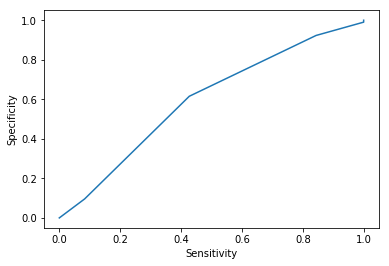

In [135]:
# TODO
# ROC curve
my_model.fit(features[train_indices], labels[train_indices], k=100, distance_f=distance, **kwargs_f)
pred_ratios = my_model.predict(features[test_indices])

roc_sens, roc_spec_ = ROC(labels[test_indices], pred_ratios, np.arange(0.1, 1.0, 0.1))
plt.plot(roc_sens, roc_spec_)
plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.show()

## TASK 7: Assess suitability of *k*-NN to your dataset

Use this cell to write about your understanding of why *k*-NN performed well if it did or why not if it didn't.